In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Plotting two normally distributed variables Y1 and Y2

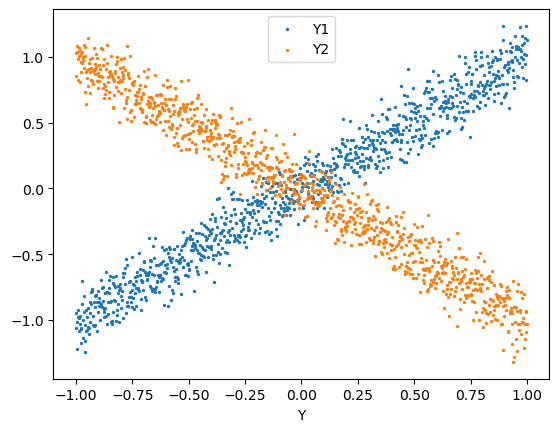

In [3]:
X = np.linspace(-1, 1, 1000)

Y1 = X + np.random.normal(0, 0.5, (1000,))/4
Y2 = -X + np.random.normal(0, 0.5, (1000,))/4

plt.scatter(X, Y1, label="Y1", s=2)
plt.scatter(X, Y2, label="Y2", s=2)
plt.xlabel("X")
plt.xlabel("Y")
plt.legend(loc=9)
plt.show()

Correlation coefficients indicate the linear strength of the relation between X and Y1, X and Y2

In [8]:
print("Correlation between X and Y1:")
print(np.corrcoef(X, Y1))
print("Correlation between X and Y2:")
print(np.corrcoef(X, Y2))
print("Correlation between X, Y1, and Y2:")
print(np.corrcoef([X, Y1, Y2]))

Correlation between X and Y1:
[[1.         0.97782341]
 [0.97782341 1.        ]]
Correlation between X and Y2:
[[ 1.         -0.97813907]
 [-0.97813907  1.        ]]
Correlation between X, Y1, and Y2:
[[ 1.          0.97782341 -0.97813907]
 [ 0.97782341  1.         -0.95618068]
 [-0.97813907 -0.95618068  1.        ]]


$$
    r = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum(x_i-\overline{x})^2 \sum(y_i-\overline{y})^2}}
$$

In [7]:
def corrcoef(x, y):
    return np.sum((x-x.mean()) * (y-y.mean())) / np.sqrt(np.sum((x-x.mean())**2) * np.sum((y-y.mean())**2))

np.array([
    [corrcoef(X, X), corrcoef(X, Y1), corrcoef(X, Y2)],
    [corrcoef(Y1, X), corrcoef(Y1, Y1), corrcoef(Y1, Y2)],
    [corrcoef(Y2, X), corrcoef(Y2, Y1), corrcoef(Y2, Y2)]
])

array([[ 1.        ,  0.97782341, -0.97813907],
       [ 0.97782341,  1.        , -0.95618068],
       [-0.97813907, -0.95618068,  1.        ]])

Rescaling data involves setting the features to have mean 0 and standard deviation 1 via $\frac{(x_i - \overline{x_i})}{\sigma_i}$

In [88]:
data = np.array([
    [-3, -1, 1],
    [-1, 0, 1],
    [1, 1, 1]
], dtype='float64')


def rescale(data):
    means = data.mean(axis=1)
    stds = data.std(axis=1, ddof=1)
    return np.divide(data - means, stds, out=data, where=stds>0)

res = rescale(data=data)
res

array([[-1., -1.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  1.,  1.]])

In [89]:
res.mean(axis=0), res.std(axis=0, ddof=1)

(array([0., 0., 1.]), array([1., 1., 0.]))

In [91]:
data = np.array([
    [63, 160, 150],
    [67, 170.2, 160],
    [70, 177.8, 171]
], dtype='float64')

res = rescale(data=data)
res

array([[-1.14961835,  0.48534117,  0.17226761],
       [-1.07464324,  0.66470638,  0.33790955],
       [-1.01841191,  0.79835105,  0.52011568]])

In [92]:
res.mean(axis=0), res.std(axis=0, ddof=1)

(array([-1.08089117,  0.6494662 ,  0.34343095]),
 array([0.06582598, 0.15706048, 0.17398975]))

In [105]:
[x for x in zip(res[:, 2], res[1:, 2])]

[(0.17226761358164228, 0.3379095497178367),
 (0.3379095497178367, 0.5201156794676506)]